# Multivariate Linear Regression using 2021 MLB batting data

## Predict batting average from OBP and Hits

## Import Neccesary Libraries

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline

## Import dataset CSV file; Set index to player; Sort based on team

In [104]:
df = pd.read_csv('2021MLBbattingStats.csv')
df = df.set_index(['Team','Player'])
df = df.sort_index()
df.head()

Pos  Age    G   AB   R   H  2B  3B  HR  RBI  ...  CS  \
Team Player                                                        ...       
ARI  Andrew Young      2B   28   58   91  13  19   7   0   6   15  ...   0   
     Asdrubal Cabrera  3B   36   90  283  34  69  21   0   7   40  ...   0   
     Bryan Holaday      C   34   13   31   2   6   2   0   0    1  ...   0   
     Carson Kelly       C   27   98  304  41  73  11   1  13   46  ...   0   
     Christian Walker  1B   31  115  401  55  98  23   1  10   46  ...   0   

                       BB   SO  SH  SF  HBP    AVG    OBP    SLG    OPS  
Team Player                                                              
ARI  Andrew Young       6   45   0   1    6  0.209  0.298  0.484  0.782  
     Asdrubal Cabrera  33   73   0   3    2  0.244  0.324  0.392  0.716  
     Bryan Holaday      1   15   0   0    2  0.194  0.265  0.258  0.523  
     Carson Kelly      44   74   0   5    6  0.240  0.343  0.411  0.754  
     Christian Walker  38  106   0   2    4  0.244  0.315  0.382  0.697  

[5 rows x 21 columns]

In [105]:
list(df.columns)

['Pos',
 'Age',
 'G',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'SB',
 'CS',
 'BB',
 'SO',
 'SH',
 'SF',
 'HBP',
 'AVG',
 'OBP',
 'SLG',
 'OPS']

## Remove outliers

## Define x and y

In [106]:
# x ~ independent variables ~ On base % and hits
x = df[['OBP', 'H']].values

# y ~ dependent variable
y = df['AVG'].values

## Split dataset into training set and test set

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [108]:
x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)

## Train model on the training set

In [109]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Predict test set results

In [110]:
y_pred=model.predict(x_test)

## Evaluate model 

In [111]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7403804733997226

## Plot results

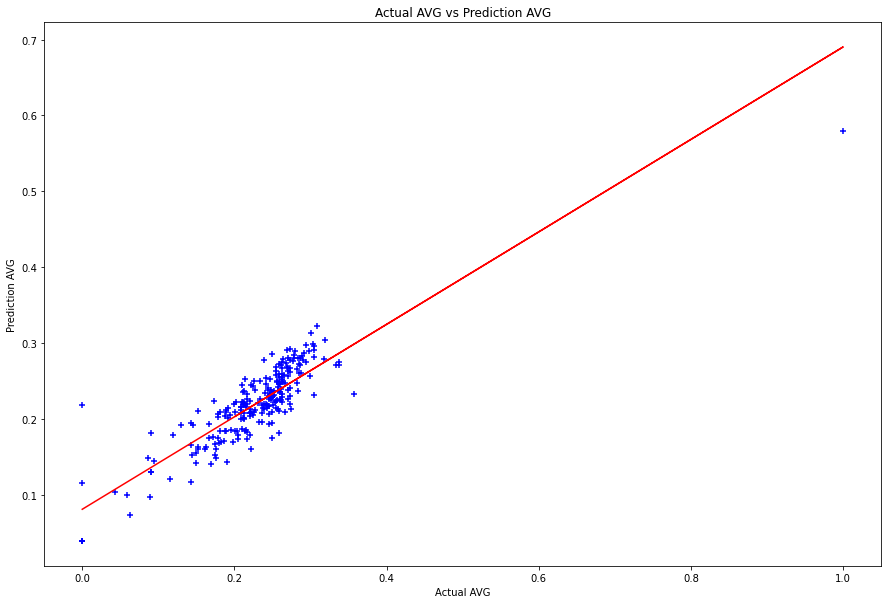

In [112]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred, color = "blue", marker = "+")
plt.xlabel('Actual AVG')
plt.ylabel('Prediction AVG')
plt.title('Actual AVG vs Prediction AVG')

z = np.polyfit (y_test,y_pred,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color = "red")


## Actual values vs Predicted values

In [113]:
pred_y_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:25]

,Actual Value,Predicted Value,Difference
0,0.000,0.116378,-0.116378
1,0.285,0.261240,0.023760
2,0.220,0.223357,-0.003357
3,0.303,0.298775,0.004225
4,0.247,0.233042,0.013958
5,0.254,0.269175,-0.015175
6,0.357,0.233555,0.123445
7,0.261,0.271138,-0.010138
8,0.150,0.142767,0.007233
9,0.119,0.178523,-0.059523
